# 2D Discrete Fourier Transform

The goal of this short tutorial is to gain intuition about the 2D Discrete Fourier Transform. 

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

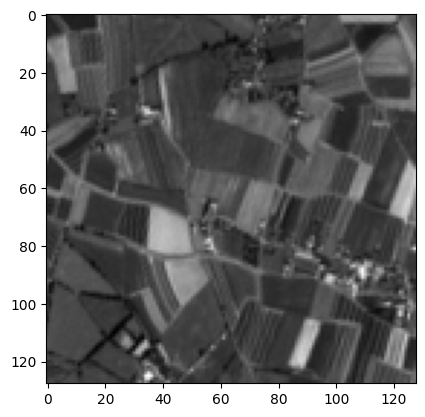

In [2]:
image = np.load('s2_band.npy')

fig, ax = plt.subplots()
plt.imshow(image, cmap='gray')
plt.show()

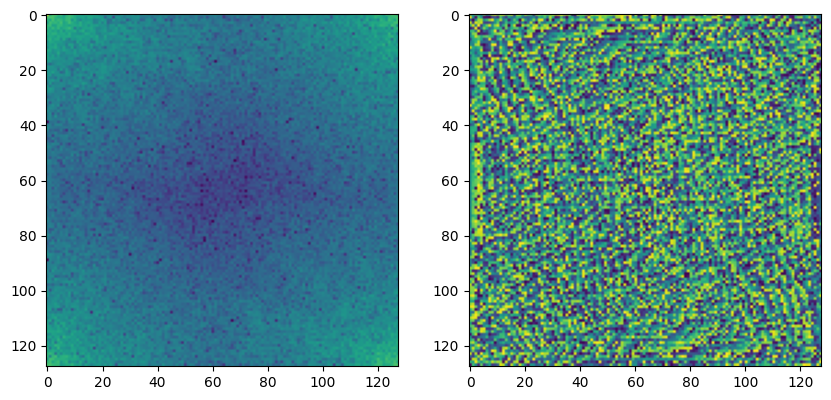

In [3]:
fourier_transform = np.fft.fft2(image)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(np.log(np.abs(fourier_transform) + 1e-9))
ax[1].imshow(np.angle(fourier_transform))
plt.show()

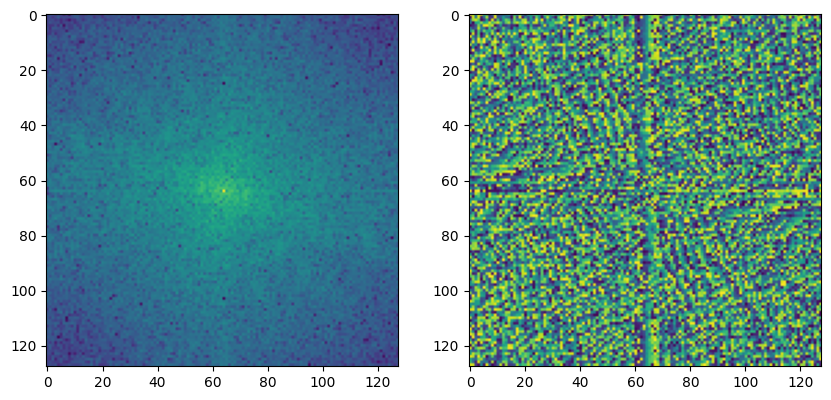

In [4]:
fourier_transform = np.fft.fftshift(np.fft.fft2(image))

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(np.log(np.abs(fourier_transform) + 1e-9))
ax[1].imshow(np.angle(fourier_transform))
plt.show()

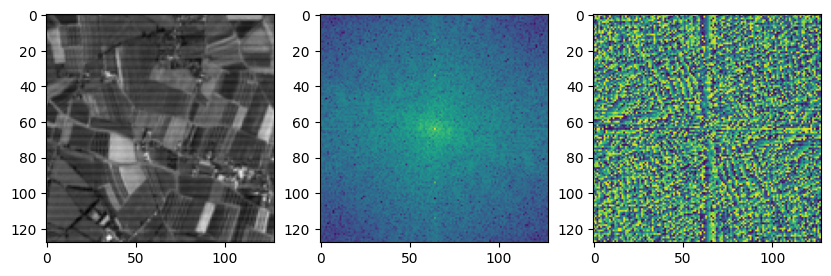

In [6]:
center = fourier_transform.shape[0] // 2

banding_fourier_transform = np.fft.fftshift(np.fft.fft2(image))

banding_fourier_transform[center - 30, center] *= np.exp(5)
banding_fourier_transform[center + 30, center] *= np.exp(5)
banding_fourier_transform[center - 50, center] *= np.exp(3)
banding_fourier_transform[center + 50, center] *= np.exp(3)

banding_image = np.abs(np.fft.ifft2(banding_fourier_transform))

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(banding_image, cmap='gray')
ax[1].imshow(np.log(np.abs(banding_fourier_transform) + 1e-9))
ax[2].imshow(np.angle(banding_fourier_transform))
plt.show()

In [7]:
class FourierBasis:
    def __init__(self, M, N):
        self.M = M
        self.N = N
        self.xx, self.yy = np.meshgrid(np.arange(M), np.arange(N))

    def __call__(self, u, v):
        x = 2 * np.pi * (u * self.xx / self.M + v * self.yy / self.N)
        real_part = np.cos(x)
        imag_part = np.sin(x)
        return real_part, imag_part

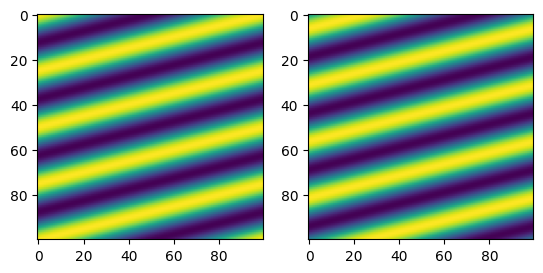

In [8]:
fourier_basis = FourierBasis(100, 100)

vec1_real, vec1_imag = fourier_basis(u=1, v=4)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(vec1_real)
ax[1].imshow(vec1_imag)
plt.show()

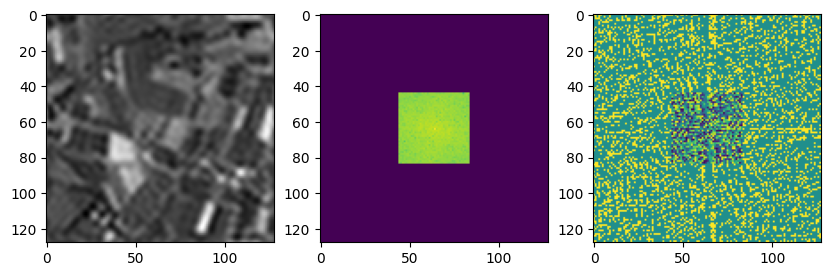

In [9]:
threshold = 20
low_pass = np.zeros_like(fourier_transform)
low_pass[center - threshold : center + threshold, center - threshold : center + threshold] = 1

low_freq_fourier = fourier_transform * low_pass
low_freq_img = np.abs(np.fft.ifft2(low_freq_fourier))

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(low_freq_img, cmap='gray')
ax[1].imshow(np.log(np.abs(low_freq_fourier) + 1e-9))
ax[2].imshow(np.angle(low_freq_fourier))
plt.show()

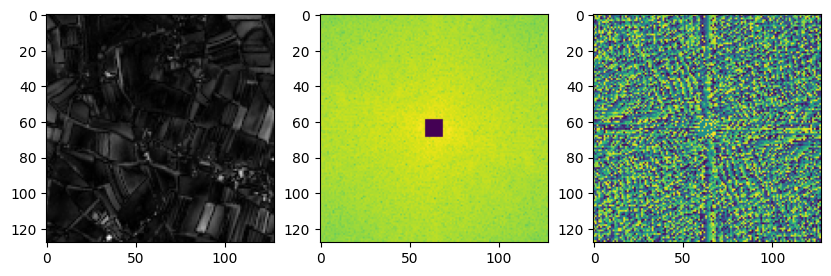

In [10]:
threshold = 5
high_pass = np.ones_like(fourier_transform)
high_pass[center - threshold : center + threshold, center - threshold : center + threshold] = 0

high_freq_fourier = fourier_transform * high_pass
high_freq_img = np.abs(np.fft.ifft2(high_freq_fourier))

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(high_freq_img, cmap='gray')
ax[1].imshow(np.log(np.abs(high_freq_fourier) + 1e-9))
ax[2].imshow(np.angle(high_freq_fourier))
plt.show()

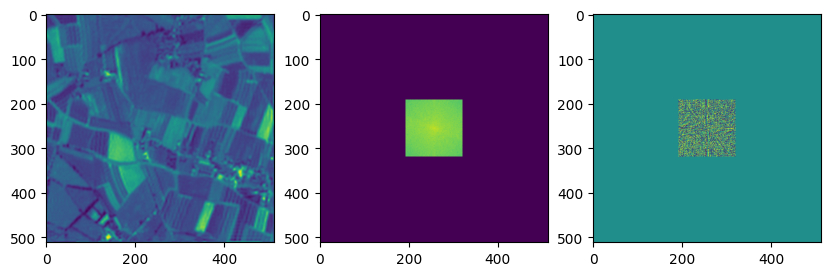

In [11]:
up_scale = 4
img_shape = image.shape
up_img_shape = (img_shape[0] * up_scale, img_shape[1] * up_scale)
n_rows = up_img_shape[0] - img_shape[0]
n_cols = up_img_shape[1] - img_shape[1]

up_fourier_transform = np.concatenate((np.zeros((n_rows // 2, img_shape[0])), fourier_transform), axis=0)
up_fourier_transform = np.concatenate((up_fourier_transform, np.zeros((n_rows // 2, img_shape[0]))), axis=0)
up_fourier_transform = np.concatenate((up_fourier_transform, np.zeros((up_img_shape[0], n_cols // 2))), axis=1)
up_fourier_transform = np.concatenate((np.zeros((up_img_shape[0], n_cols // 2)), up_fourier_transform), axis=1)

up_image = np.fft.ifft2(up_fourier_transform)

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(np.abs(up_image))
ax[1].imshow(np.log(np.abs(up_fourier_transform) + 1e-9))
ax[2].imshow(np.angle(up_fourier_transform))
plt.show()

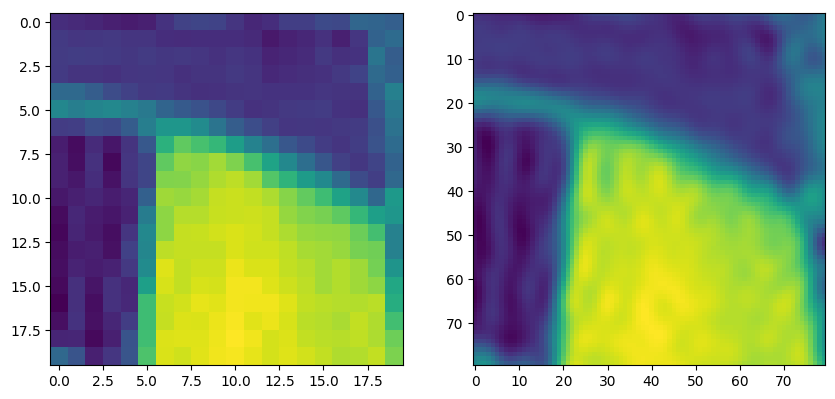

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image[60:80, 30:50])
ax[1].imshow(np.abs(up_image[240:320, 120:200]))
plt.show()

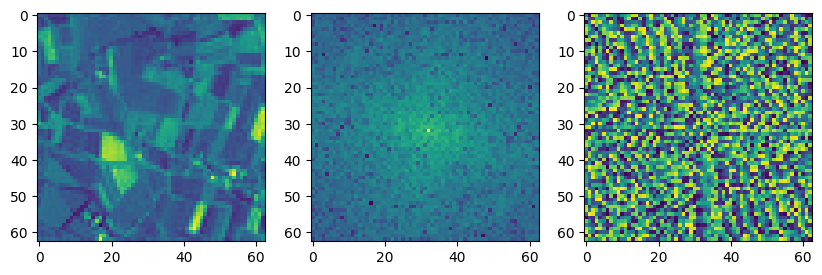

In [15]:
down_scale = 2

down_fourier_transform = fourier_transform[center -  fourier_transform.shape[0] // (2 * down_scale) : center + fourier_transform.shape[0] // (2 * down_scale) - 1]
down_fourier_transform = down_fourier_transform[:, center -  fourier_transform.shape[0] // (2 * down_scale) : center + fourier_transform.shape[0] // (2 * down_scale) - 1]


down_image = np.fft.ifft2(down_fourier_transform)

fig, ax = plt.subplots(1, 3, figsize=(10, 10))
ax[0].imshow(np.abs(down_image))
ax[1].imshow(np.log(np.abs(down_fourier_transform) + 1e-9))
ax[2].imshow(np.angle(down_fourier_transform))
plt.show()

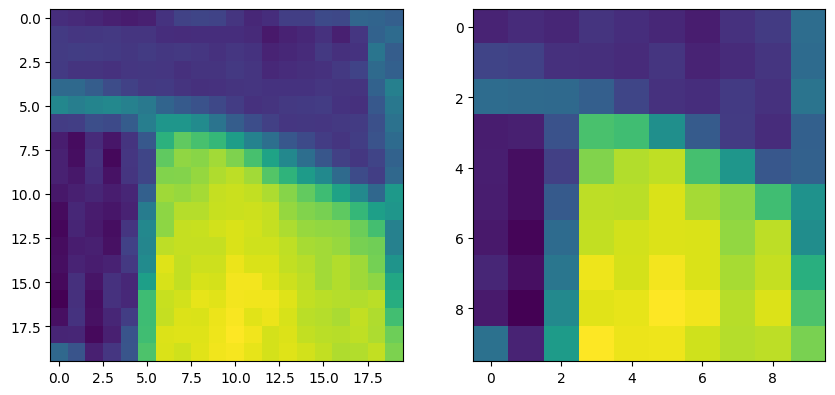

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image[60:80, 30:50])
ax[1].imshow(np.abs(down_image[30:40, 15:25]))
plt.show()